# Challenge 1: What makes a diamond valuable?

## Load the dataset

In [1]:
# Clone the dataset from Github
!git clone https://github.com/1giacomo/xtream-ai-assignment.git

Cloning into 'xtream-ai-assignment'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 82 (delta 18), reused 21 (delta 8), pack-reused 41
Receiving objects: 100% (82/82), 1001.73 KiB | 7.42 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [2]:
# Load the dataset from the .csv file
import pandas as pd
diamonds = pd.read_csv("./xtream-ai-assignment/datasets/diamonds/diamonds.csv")

In [3]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82
...,...,...,...,...,...,...,...,...,...,...
4995,0.38,Ideal,H,VVS2,62.3,53.3,832,4.65,4.69,2.91
4996,0.33,Premium,G,VVS2,61.3,59.0,927,4.45,4.42,2.72
4997,1.25,Ideal,J,VVS2,62.1,56.0,5980,6.81,6.84,4.24
4998,0.31,Premium,F,VS2,62.9,58.0,802,4.31,4.27,2.70


## Raw data vis

Objective: to understand the dataset.

I notice:

* Some points on the ```y=0 axes```
* Some random point out of the distrubution
* Misterius points on ```carat=4``` and ```carat=3```

<Axes: xlabel='carat', ylabel='price'>

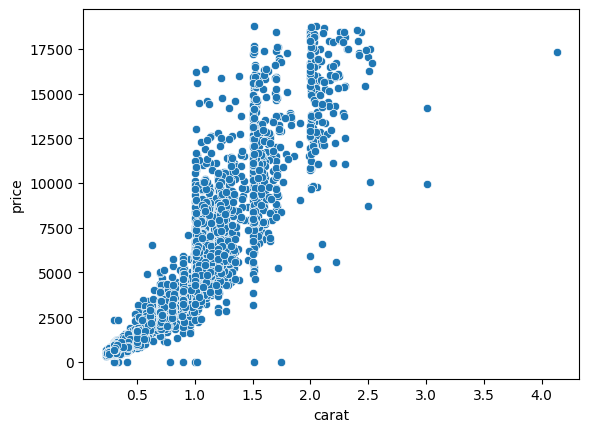

In [4]:
import seaborn as sns

sns.scatterplot(x='carat', y='price', data=diamonds)

## Dataset describe

Trying to investigate on ```price=0``` diamonds, I also find out ```size=0``` diamonds.


In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.794486,61.711660,57.447060,3925.53940,5.725188,5.727744,3.533076
std,0.468424,1.446206,2.258999,3975.45212,1.119156,1.112106,0.690334
min,0.230000,44.000000,51.600000,-1.00000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,936.00000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2392.50000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5369.25000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.00000,10.000000,9.850000,6.430000


## Data cleaning

Requirements:
* Price: ```price > 0```
* Size: ```x > 0```, ```y > 0``` and ```z > 0```


In [11]:
cleaned_diamonds = diamonds[diamonds['price'] > 0][diamonds['x'] > 0][diamonds['y'] > 0][diamonds['x'] > 0]
cleaned_diamonds.describe()

<ipython-input-11-2208fab6cdea>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_diamonds = diamonds[diamonds['price'] > 0][diamonds['x'] > 0][diamonds['y'] > 0][diamonds['x'] > 0]


,carat,depth,table,price,x,y,z
count,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000
mean,0.794117,61.710844,57.446242,3930.581880,5.726232,5.728821,3.533678
std,0.467981,1.445563,2.259752,3970.923311,1.116257,1.109167,0.688437
min,0.230000,44.000000,51.600000,351.000000,3.860000,3.840000,1.410000
25%,0.400000,61.000000,56.000000,942.000000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2398.000000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5376.000000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.000000,10.000000,9.850000,6.430000


## Data vis

### Carat and cut vs. price

<Axes: xlabel='carat', ylabel='price'>

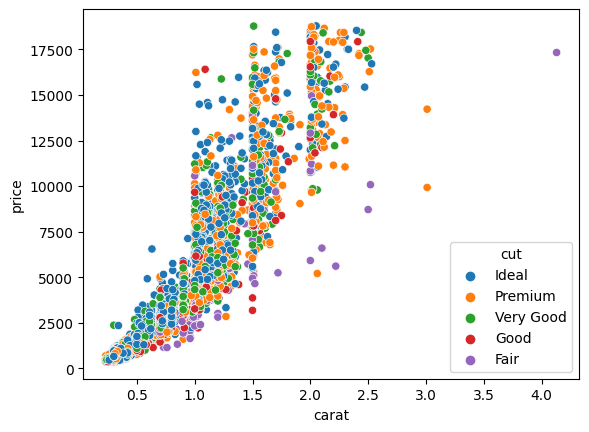

In [14]:
sns.scatterplot(x='carat', y='price', hue='cut', data=cleaned_diamonds)

### Size vs. price

The visualizzation appears really similar.

Of course because a bigger diamond has a bigger mass (and a more carats).

<Axes: xlabel='size', ylabel='price'>

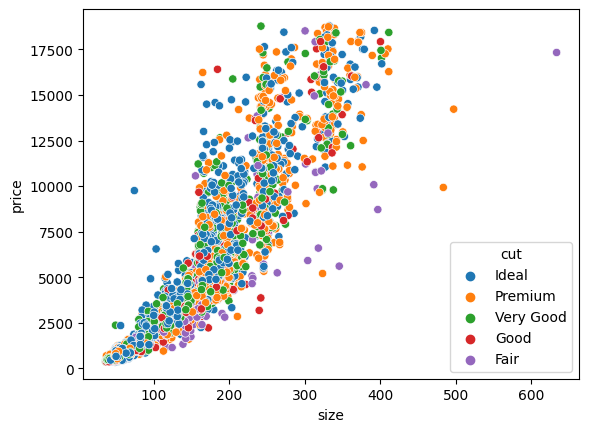

In [25]:
cleaned_diamonds['size'] = cleaned_diamonds['x']*cleaned_diamonds['y']*cleaned_diamonds['z']
sns.scatterplot(x='size', y='price', hue='cut', data=cleaned_diamonds)